In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nutrient=pd.read_csv('nutrient.csv',index_col=0)
nutrient

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [4]:
scaler=StandardScaler()
nutrient_scaled=scaler.fit_transform(nutrient)
nutrient_scaled=pd.DataFrame(nutrient_scaled,columns=nutrient.columns,index=nutrient.index)
nutrient_scaled

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,1.335059,0.239681,1.314297,-0.456581,0.152385
HAMBURGER,0.378515,0.479361,0.318516,-0.456581,0.222121
BEEF ROAST,2.140569,-0.958723,2.310078,-0.482699,-0.266028
BEEF STEAK,1.687470,0.000000,1.676399,-0.456581,0.152385
BEEF CANNED,-0.275962,0.719042,-0.315163,-0.352109,0.919476
CHICKEN BROILED,-0.930439,0.239681,-0.948842,-0.469640,-0.684442
CHICKEN CANNED,-0.376651,1.438084,-0.586740,-0.417404,-0.614706
BEEF HEART,-0.477340,1.677764,-0.767791,-0.391286,2.453658
LAMB LEG ROAST,0.579893,0.239681,0.590093,-0.456581,0.152385


In [5]:
clust_DB=DBSCAN(eps=1,min_samples=2)
clust_DB.fit(nutrient_scaled)
clust_DB.labels_

array([ 0,  0, -1,  0,  1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  1,  1, -1,
       -1,  2,  2,  2,  3,  2,  3, -1,  1, -1])

In [6]:
eps_range=[0.2,0.4,0.6,1]
mp_range=[2,3,4,5]
score=[]

In [7]:
for i in eps_range:
    for j in mp_range:
        clust_DB=DBSCAN(eps=i,min_samples=j)
        clust_DB.fit(nutrient_scaled.iloc[:,:5])
        distincts=len(np.unique(clust_DB.labels_))
        if distincts>2:
            nutrient_scaled['Clust']=clust_DB.labels_
            nutrient_scl_inliers=nutrient_scaled[nutrient_scaled['Clust']!=-1]
            a=silhouette_score(nutrient_scl_inliers.iloc[:,:-1],nutrient_scl_inliers.iloc[:,-1])
            score.append([i,j,distincts,a])             
score 

[[0.2, 2, 3, 0.5710837307456915],
 [0.4, 2, 3, 0.9040570858308878],
 [0.6, 2, 4, 0.7752441663222646],
 [1, 2, 5, 0.43236957939711584],
 [1, 3, 4, 0.43147150560271585]]

In [8]:
clust_DB=DBSCAN(eps=0.4,min_samples=2)
clust_DB.fit(nutrient_scaled)

DBSCAN(eps=0.4, min_samples=2)

In [9]:
prcomp=PCA()
scores=prcomp.fit_transform(nutrient_scaled)

In [10]:
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'cluster':clust_DB.labels_})
df_PCs

,PC1,PC2,cluster
0,-1.804161,-0.755037,0
1,-0.624979,-0.234719,-1
2,-2.666377,-1.945605,-1
3,-2.204971,-0.988715,0
4,0.168164,0.462686,-1
5,0.712106,1.556594,-1
6,-0.029977,1.512167,1
7,0.927286,-1.350632,-1
8,-0.888291,-0.371226,-1
9,-1.340737,-0.570819,-1


/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


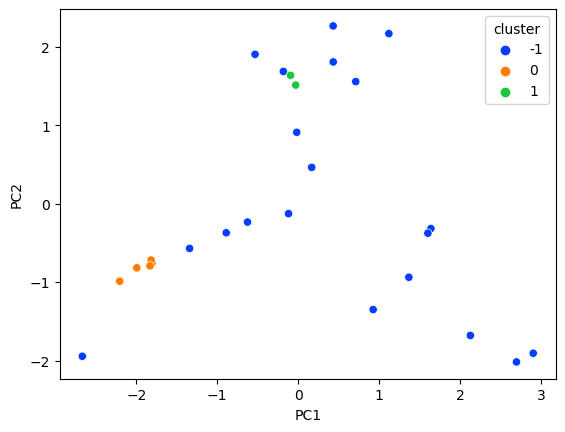

In [11]:
sns.scatterplot(data=df_PCs,x='PC1',y='PC2',hue='cluster',palette='bright')
plt.show()